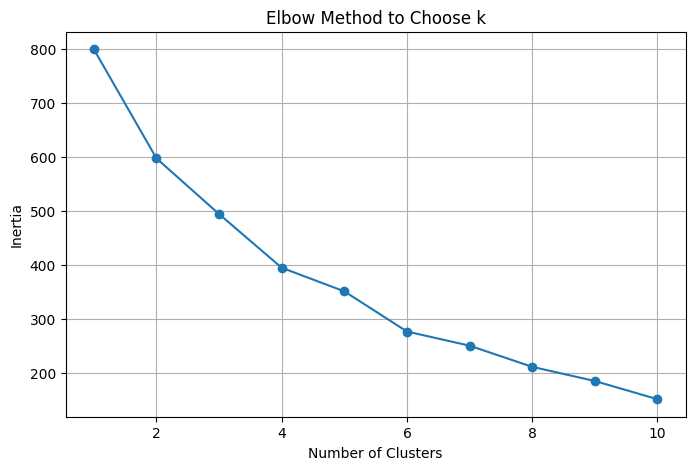

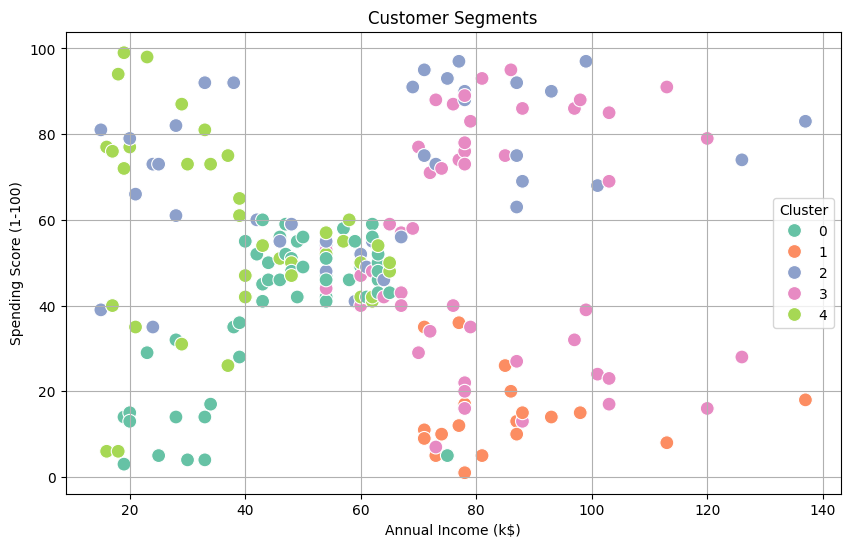

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


In [3]:
# 📊 Customer Segmentation with K-Means Clustering

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# 1. Load dataset
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv"
df = pd.read_csv(url)  # Data has CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100) :contentReference[oaicite:1]{index=1}

# 2. Data preprocessing
df = df.drop("CustomerID", axis=1)
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  # Male=1, Female=0

# 3. Scale numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 4. Use Elbow method to find optimal cluster count
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method to Choose k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# 5. Train K-Means with optimal k (e.g., 5)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)

# 6. Visualize clusters: Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    s=100
)
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# 7. Show sample of clustered data
df.head()


